In [1]:
# import packages
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import calendar
%matplotlib inline

In [2]:
#PLOT: mv accidents vs. month (by year, by borough)

In [3]:
# download NYPD Motor Vehicle Collisions from NYC open data 
!curl https://data.cityofnewyork.us/api/views/h9gi-nx95/rows.csv?accessType=DOWNLOAD > mv_accidents.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  291M    0  291M    0     0  2199k      0 --:--:--  0:02:15 --:--:-- 2307k


In [4]:
!mv mv_accidents.csv $PUIDATA

In [5]:
mv = pd.read_csv(os.getenv("PUIDATA") + "/mv_accidents.csv")
mv.head()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,11/16/2018,0:10,MANHATTAN,10010,40.742275,-73.988914,"(40.742275, -73.988914)",5 AVENUE,BROADWAY,NaN,...,Unspecified,NaN,NaN,NaN,4021880,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
1,11/16/2018,0:40,NaN,NaN,40.762720,-73.728170,"(40.76272, -73.72817)",LONG ISLAND EXPRESSWAY,NaN,NaN,...,Pavement Slippery,NaN,NaN,NaN,4021727,Sedan,Pick-up Truck,NaN,NaN,NaN
2,11/16/2018,0:45,BROOKLYN,11211,40.710197,-73.958430,"(40.710197, -73.95843)",BORINQUEN PLACE,HAVEMEYER STREET,NaN,...,Driver Inattention/Distraction,NaN,NaN,NaN,4021791,Taxi,Taxi,NaN,NaN,NaN
3,11/16/2018,1:00,BRONX,10454,40.803555,-73.911840,"(40.803555, -73.91184)",EAST 137 STREET,WILLOW AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4021878,Garbage or Refuse,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
4,11/16/2018,1:00,BROOKLYN,11221,40.694923,-73.915565,"(40.694923, -73.915565)",WILSON AVENUE,PALMETTO STREET,NaN,...,Unspecified,NaN,NaN,NaN,4021848,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN


In [6]:
# convert date to a datetime object 
mv['date'] = mv['DATE'].apply(lambda x: dt.datetime.strptime(x, '%m/%d/%Y'))
mv.head()

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,date
0,11/16/2018,0:10,MANHATTAN,10010,40.742275,-73.988914,"(40.742275, -73.988914)",5 AVENUE,BROADWAY,NaN,...,NaN,NaN,NaN,4021880,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,2018-11-16
1,11/16/2018,0:40,NaN,NaN,40.762720,-73.728170,"(40.76272, -73.72817)",LONG ISLAND EXPRESSWAY,NaN,NaN,...,NaN,NaN,NaN,4021727,Sedan,Pick-up Truck,NaN,NaN,NaN,2018-11-16
2,11/16/2018,0:45,BROOKLYN,11211,40.710197,-73.958430,"(40.710197, -73.95843)",BORINQUEN PLACE,HAVEMEYER STREET,NaN,...,NaN,NaN,NaN,4021791,Taxi,Taxi,NaN,NaN,NaN,2018-11-16
3,11/16/2018,1:00,BRONX,10454,40.803555,-73.911840,"(40.803555, -73.91184)",EAST 137 STREET,WILLOW AVENUE,NaN,...,NaN,NaN,NaN,4021878,Garbage or Refuse,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,2018-11-16
4,11/16/2018,1:00,BROOKLYN,11221,40.694923,-73.915565,"(40.694923, -73.915565)",WILSON AVENUE,PALMETTO STREET,NaN,...,NaN,NaN,NaN,4021848,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,2018-11-16


In [7]:
mv.shape

(1385920, 30)

In [8]:
# drop columns we don't need 
mv.columns

Index(['DATE', 'TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE', 'LONGITUDE',
       'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME', 'OFF STREET NAME',
       'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED',
       'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED',
       'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED',
       'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED',
       'CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2',
       'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4',
       'CONTRIBUTING FACTOR VEHICLE 5', 'UNIQUE KEY', 'VEHICLE TYPE CODE 1',
       'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4',
       'VEHICLE TYPE CODE 5', 'date'],
      dtype='object')

In [9]:
mv_s = mv[['BOROUGH', 'UNIQUE KEY', 'date']]
mv_s = mv_s.rename(columns={'BOROUGH':'bor', 'UNIQUE KEY':'id'})
mv_s.head()

,bor,id,date
0,MANHATTAN,4021880,2018-11-16
1,NaN,4021727,2018-11-16
2,BROOKLYN,4021791,2018-11-16
3,BRONX,4021878,2018-11-16
4,BROOKLYN,4021848,2018-11-16


In [10]:
mv_s.isnull().sum()

bor     409431
id           0
date         0
dtype: int64

In [11]:
# drop na values 
mv_s.dropna(inplace=True)

In [12]:
# extract month and year 
mv_s['month'] = mv_s.date.apply(lambda x: x.month)
mv_s['year'] = mv_s.date.apply(lambda x: x.year)
mv_s.head()

,bor,id,date,month,year
0,MANHATTAN,4021880,2018-11-16,11,2018
2,BROOKLYN,4021791,2018-11-16,11,2018
3,BRONX,4021878,2018-11-16,11,2018
4,BROOKLYN,4021848,2018-11-16,11,2018
7,BRONX,4021864,2018-11-16,11,2018


In [13]:
mv_s.date.min()

Timestamp('2012-07-01 00:00:00')

In [14]:
mv_s.date.max()

Timestamp('2018-11-16 00:00:00')

In [15]:
# extract data for 1/1/2013 - 12/31/2017 
mv4 = mv_s[(mv_s['date'] >= '2013-01-01 00:00:00') & (mv_s['date'] < '2018-01-01 00:00:00')]

In [16]:
mv4.shape

(769962, 5)

In [17]:
mv4.bor.unique()

array(['BRONX', 'MANHATTAN', 'QUEENS', 'BROOKLYN', 'STATEN ISLAND'], dtype=object)

In [18]:
# subsample for testing
samp = mv4[::1000]
samp.shape

(770, 5)

In [19]:
# get total accidents by borough by month over the last 5 years 
bor_my_grp = mv4.groupby(['bor', 'month', 'year'])['id'].count()
bor_my_grp

bor            month  year
BRONX          1      2013    1486
                      2014    1635
                      2015    1704
                      2016    1878
                      2017    1680
               2      2013    1542
                      2014    1688
                      2015    1435
                      2016    1644
                      2017    1601
               3      2013    1746
                      2014    1562
                      2015    1825
                      2016    1732
                      2017    1888
               4      2013    1602
                      2014    1530
                      2015    1623
                      2016    1825
                      2017    1737
               5      2013    1808
                      2014    1686
                      2015    1839
                      2016    2010
                      2017    2012
               6      2013    1748
                      2014    1748
                      2015  

In [20]:
# separate by borough
bx = mv4[mv4['bor'] == 'BRONX']
mn = mv4[mv4['bor'] == 'MANHATTAN']
bk = mv4[mv4['bor'] == 'BROOKLYN']
si = mv4[mv4['bor'] == 'STATEN ISLAND']
qu = mv4[mv4['bor'] == 'QUEENS']

In [21]:
samp.head()

,bor,id,date,month,year
200238,BRONX,3820806,2017-12-31,12,2017
201804,STATEN ISLAND,3818816,2017-12-29,12,2017
203362,BROOKLYN,3816887,2017-12-26,12,2017
204932,QUEENS,3814849,2017-12-23,12,2017
206512,BROOKLYN,3814385,2017-12-20,12,2017


In [22]:
counts_bx = samp.date[samp.bor=='BRONX'].groupby([samp.date.dt.month]).count()
counts_bx

date
1     10
2      6
3     10
4      9
5      5
6      9
7      4
8      9
9      8
10     5
11     8
12     8
Name: date, dtype: int64

In [23]:
samp.date[samp.bor=='BRONX'].groupby([samp.date.dt.month])

In [24]:
# I got borough populations for 2014 - 2016 from the ACS here: 
# https://www1.nyc.gov/site/planning/data-maps/nyc-population/american-community-survey.page

# I could not load this data reproducibly because it is only provided in Excel or PDF format 

# I got the 2017 borough population estimate here: https://www1.nyc.gov/site/planning/data-maps/nyc-population/current-future-populations.page
# because the 2017 estimates are not provided in the ACS 

bx17pop = 1471160
bk17pop = 2648771
qu17pop = 2358582
si17pop = 479458
mn17pop = 1664727

bx16pop = 1455720
bk16pop = 2629150
qu16pop = 2333054
si16pop = 476015
mn16pop = 1643734

bx15pop = 1455444
bk15pop = 2636735
qu15pop = 2339150
si15pop = 474558
mn15pop = 1644518

bx14pop = 1438159
bk14pop = 2621793
qu14pop = 2321580
si14pop = 473279
mn14pop = 1636268

In [25]:
# calculate the average population for each borough over the 4 years 
bx_avg_pop = (bx14pop + bx15pop + bx16pop + bx17pop) / 4
bk_avg_pop = (bk14pop + bk15pop + bk16pop + bk17pop) / 4
qu_avg_pop = (qu14pop + qu15pop + qu16pop + qu17pop) / 4
si_avg_pop = (si14pop + si15pop + si16pop + si17pop) / 4
mn_avg_pop = (mn14pop + mn15pop + mn16pop + mn17pop) / 4

In [26]:
# get the counts of accidents by each borough and each month 
counts_bx = mv4.date[mv4.bor=='BRONX'].groupby([mv4.date.dt.month]).count()
counts_bk = mv4.date[mv4.bor=='BROOKLYN'].groupby([mv4.date.dt.month]).count()
counts_mn = mv4.date[mv4.bor=='MANHATTAN'].groupby([mv4.date.dt.month]).count()
counts_si = mv4.date[mv4.bor=='STATEN ISLAND'].groupby([mv4.date.dt.month]).count()
counts_qu = mv4.date[mv4.bor=='QUEENS'].groupby([mv4.date.dt.month]).count()

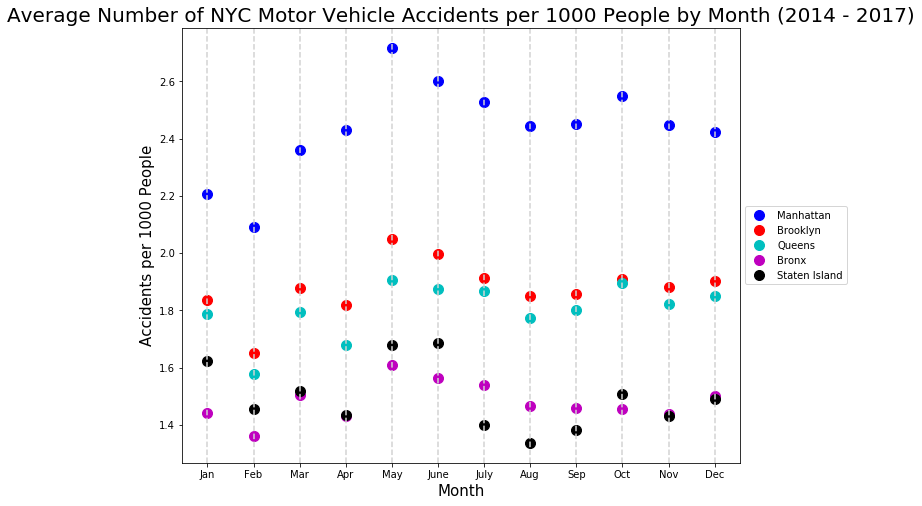

In [27]:
# plot num accidents in each borough by month 
fig = plt.figure(figsize=(10,8))
plt.plot(np.sort(mv4.date.dt.month.unique()), (((counts_mn / 4)) / mn_avg_pop) * 1e3, 'bo', label='Manhattan', markersize=10)
plt.plot(np.sort(mv4.date.dt.month.unique()), (((counts_bk / 4)) / bk_avg_pop) * 1e3, 'ro', label='Brooklyn', markersize=10)
plt.plot(np.sort(mv4.date.dt.month.unique()), (((counts_qu / 4)) / qu_avg_pop) * 1e3, 'co', label='Queens', markersize=10)
plt.plot(np.sort(mv4.date.dt.month.unique()), (((counts_bx / 4)) / bx_avg_pop) * 1e3, 'mo', label='Bronx', markersize=10)
plt.plot(np.sort(mv4.date.dt.month.unique()), (((counts_si / 4)) / si_avg_pop) * 1e3, 'ko', label='Staten Island', markersize=10)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
xposition = np.sort(mv4.date.dt.month.unique())
plt.xticks(np.sort(mv4.date.dt.month.unique()), ('Jan','Feb','Mar','Apr','May','June','July','Aug','Sep','Oct','Nov','Dec'))
for xc in xposition:
    plt.axvline(x=xc, color='lightgray', linestyle='--')
plt.title ("Average Number of NYC Motor Vehicle Accidents per 1000 People by Month (2014 - 2017)", fontsize=20)
plt.ylabel ("Accidents per 1000 People", fontsize=15)
plt.xlabel ("Month", fontsize=15)
plt.show()

**Figure 1**: The plot above shows average number of motor vehicle accidents per 1000 people by month and borough in NYC for 2014 - 2017. I took the average number of accidents for each month from 2014 to 2017 and the average population for each borough from 2014 to 2017. Manhattan has the highest number of accidents per 1000 people (residents) for every month throughout the year. Staten Island has the lowest number of accidents per 1000 people (residents) for every month except January and February when the Bronx is the lowest. May has the highest number of accidents per 1000 people for every borough, indicating that May is the most dangerous month. February has the lowest number of accidents per 1000 people for the Bronx, Queens, Brooklyn, and Manhattan indicating that February is the safest month for those boroughs. Staten Island has the lowest number of accidents per 1000 people in August. 